What are the most demanded skills for top 3 most popular Data roles?

1. Cleanup the skills column
2. Calculate the skill count based on job_title_short
3. Calculate skills percentage
4. Plot final findings

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
import seaborn as sns

#loading data
dataset = load_dataset('coachprerakmehta/data_jobs')
df = dataset['train'].to_pandas()

#data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and pd.notna(x) else x)
#If it's already a list (or is NaN), leave it as-is.

In [35]:
df_US = df[df['job_country'] == 'United States']

In [36]:
df_skills = df_US.explode('job_skills')

In [37]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count

job_skills  job_title_short          
airflow     Business Analyst               38
            Cloud Engineer                 27
            Data Analyst                  387
            Data Engineer                4716
            Data Scientist               1166
                                         ... 
zoom        Machine Learning Engineer       5
            Senior Data Analyst            50
            Senior Data Engineer           30
            Senior Data Scientist          25
            Software Engineer              16
Length: 1870, dtype: int64

In [38]:
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)


In [60]:
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [46]:
job_titles = df_skills_count['job_title_short'].unique().tolist() 
#converting array to list

In [47]:
job_titles = job_titles[:3]    #Python slicing - works on lists, strings, tuples, NumPy arrays, Pandas Series/DataFrames, etc.
sorted(job_titles[:3])

['Data Analyst', 'Data Engineer', 'Data Scientist']

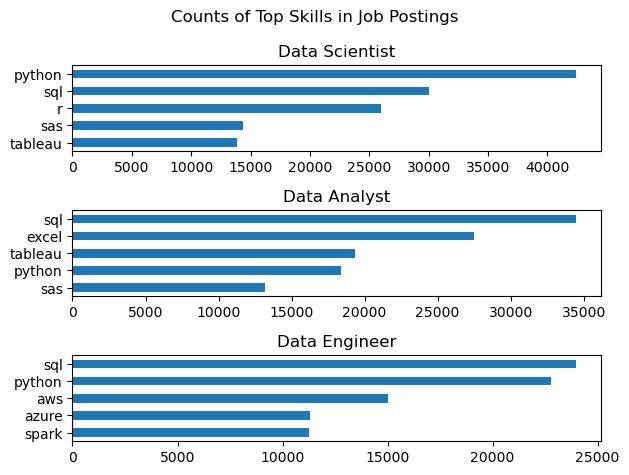

In [72]:
fig, ax = plt.subplots(len(job_titles), 1)
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title, legend=False)
    ax[i].invert_yaxis()
    ax[i].set_ylabel("")

fig.suptitle('Counts of Top Skills in Job Postings')
fig.tight_layout()
plt.show()

# df_skills_count['job_title_short'] == job_title picks only rows where the job title matches the current job_title.
# .head(5): keeps only the top 5 rows (probably the top 5 skills for that job).

In [79]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='job_total')
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')
df_skills_perc['skill_perc'] = (df_skills_perc['skill_count'] / df_skills_perc['job_total']) * 100
df_skills_perc

,job_skills,job_title_short,skill_count,job_total,skill_perc
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


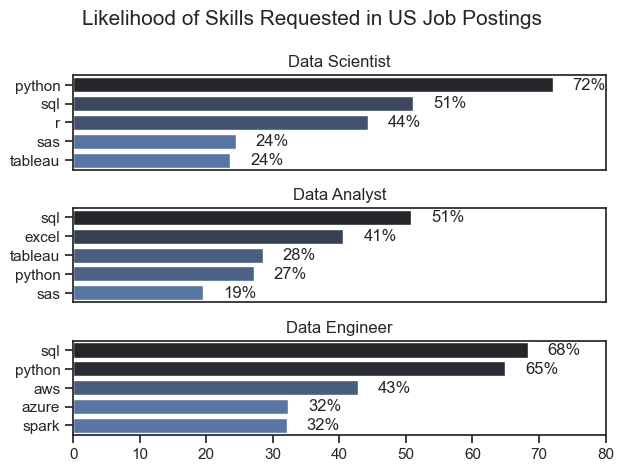

In [109]:
sns.set_theme(style='ticks')

fig, ax = plt.subplots(len(job_titles), 1)
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    #df_plot.plot(kind='barh', x='job_skills', y='skill_perc', ax=ax[i], title=job_title, legend=False)
    sns.barplot(data=df_plot, x='skill_perc', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r', legend=False)
    # sns generally plots from largest to smallest order hence we do not need 'invert_yaxis' command here
    ax[i].set_ylabel("")
    ax[i].set_title(job_title)
    ax[i].set_xlabel("")
    ax[i].set_xlim(0, 80)

    for n, v in enumerate (df_plot['skill_perc']):
        ax[i].text(v+3, n, f'{v:.0f}%', va='center')
        # v → the actual percentage value (e.g., 72.3).
        # n → the index position of the bar in the chart (0 for top, 1 for next, etc.).
        # This gives you a way to know both the value and its vertical position in the plot.

    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout()
plt.show()